In [42]:
# Machine Learning Homework 2 part 2 "Classification"

In [43]:
#Loading necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer, make_column_selector ,ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import learning_curve,validation_curve,GridSearchCV,cross_val_score,train_test_split,StratifiedKFold,cross_val_predict,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid 
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#Loading our dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#printing information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Transforming TotalCharges from object to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Descriptive statistics

df.describe( include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3985-HOYPM,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [9]:
#Checking if there are null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing null values

df=df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Target class values

df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

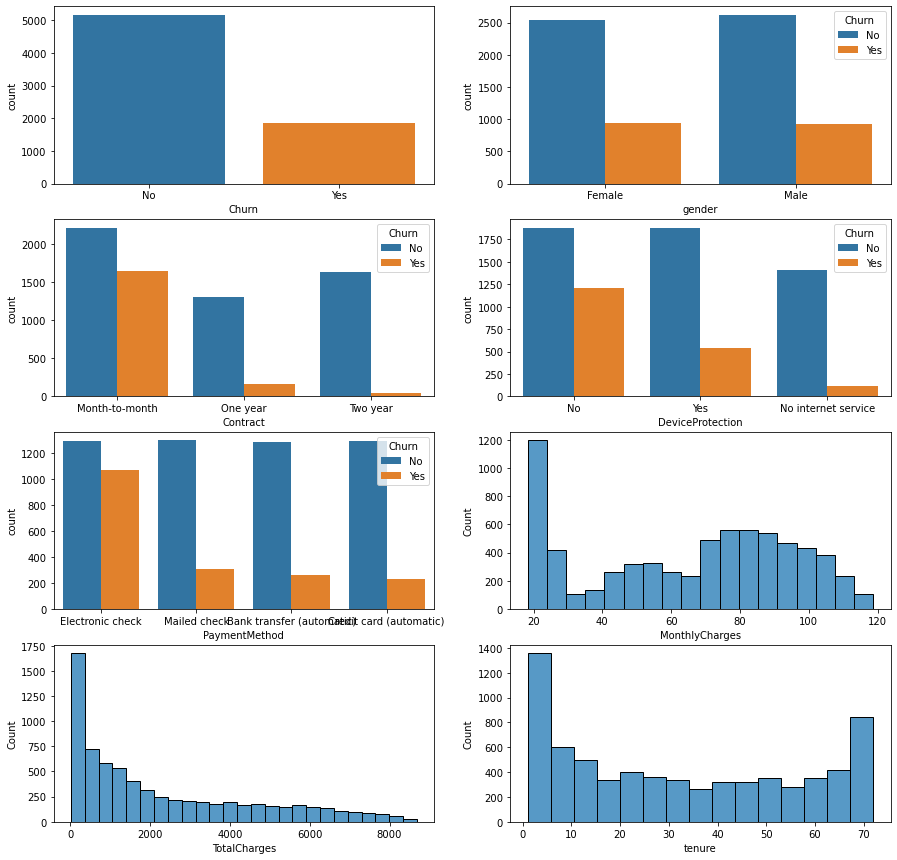

In [12]:
#Plotting the distribution

fig, ax =plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.countplot(df['Churn'], ax=ax[0][0])
sns.countplot(df['gender'], ax=ax[0][1],hue=df['Churn'])
sns.countplot(df['Contract'], ax=ax[1][0],hue=df['Churn'])
sns.countplot(df['DeviceProtection'], ax=ax[1][1],hue=df['Churn'])
sns.countplot(df['PaymentMethod'], ax=ax[2][0],hue=df['Churn'])
sns.histplot(df['MonthlyCharges'], ax=ax[2][1])
sns.histplot(df['TotalCharges'], ax=ax[3][0])
sns.histplot(df['tenure'], ax=ax[3][1])        
fig.show()

In [13]:
#Seprating Target from the rest of the Dataframe

X= df.drop(['Churn','customerID'],axis=1)
y= df['Churn']

In [14]:
#Train Test split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
#Identifying cloumn types

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [16]:
#Column transformers

# 1st column transformer which only uses OneHotEncoder to handle categorical variables
t = [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')

# 2nd column transformer which uses OneHotEncoder to handle categorical variables
# and standard scaler for Continuous variables
t = [('cat1', OneHotEncoder(handle_unknown='ignore'), categorical_ix)
    ,('cat2', StandardScaler(), numerical_ix)]
col_transform2 = ColumnTransformer(transformers=t,remainder='passthrough')

#Transforming columns for later use
X_train_=col_transform2.fit_transform(X_train)
X_test_=col_transform2.transform(X_test)

In [17]:
#Nearest Centroid

clf1 = NearestCentroid()
pipe1=Pipeline([('preprocess',col_transform),('classifier',clf1)])
score1= cross_val_score(pipe1, X_train, y_train, cv=5)
y_pred1=cross_val_predict(pipe1,X_test,y_test)

print("Cross validarion scores of",clf1,"are",score1,
      "with %0.2f accuracy with a standard deviation of %0.2f" % (score1.mean(), score1.std()))
print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

#Linear Support Vector Machine

clf2 = LinearSVC()
pipe2=Pipeline([('preprocess',col_transform),('classifier',clf2)])
score2= cross_val_score(pipe2, X_train, y_train, cv=5)
y_pred2=cross_val_predict(pipe2,X_test,y_test)

print("Cross validarion scores of",clf2,"are",score2,
      "with %0.2f accuracy with a standard deviation of %0.2f" % (score2.mean(), score2.std()))
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

#LogisticRegression

clf3 = LogisticRegression()
pipe3=Pipeline([('preprocess',col_transform),('classifier',clf3)])
score3=cross_val_score(pipe3, X_train, y_train, cv=5)
y_pred3=cross_val_predict(pipe3,X_test,y_test)

print("Coss validarion scores of",clf3, "are",score3
     ,"with %0.2f accuracy with a standard deviation of %0.2f" % (score3.mean(), score3.std()))
print(confusion_matrix(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

Cross validarion scores of NearestCentroid() are [0.51022222 0.52088889 0.51733333 0.54133333 0.49333333] with 0.52 accuracy with a standard deviation of 0.02
[[464  93]
 [577 273]]
              precision    recall  f1-score   support

          No       0.45      0.83      0.58       557
         Yes       0.75      0.32      0.45       850

    accuracy                           0.52      1407
   macro avg       0.60      0.58      0.51      1407
weighted avg       0.63      0.52      0.50      1407

Cross validarion scores of LinearSVC() are [0.77066667 0.79022222 0.78933333 0.78666667 0.48622222] with 0.72 accuracy with a standard deviation of 0.12
[[895 220]
 [146 146]]
              precision    recall  f1-score   support

          No       0.86      0.80      0.83      1115
         Yes       0.40      0.50      0.44       292

    accuracy                           0.74      1407
   macro avg       0.63      0.65      0.64      1407
weighted avg       0.76      0.74      0.75

In [18]:
#Scaling the Continuous features to see if it improves the classifiers results
# we can see that the results arent that much different than before

#Nearest Centroid

clf1 = NearestCentroid()
pipe1=Pipeline([('preprocess',col_transform2),('classifier',clf1)])
score1= cross_val_score(pipe1, X_train, y_train, cv=5)
y_pred1=cross_val_predict(pipe1,X_test,y_test)

print("Cross validarion scores of",clf1,"are",score1,
      "with %0.2f accuracy with a standard deviation of %0.2f" % (score1.mean(), score1.std()))
print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

#Linear Support Vector Machine

clf2 = LinearSVC()
pipe2=Pipeline([('preprocess',col_transform2),('classifier',clf2)])
score2= cross_val_score(pipe2, X_train, y_train, cv=5)
y_pred2=cross_val_predict(pipe2,X_test,y_test)

print("Cross validarion scores of",clf2,"are",score2,
      "with %0.2f accuracy with a standard deviation of %0.2f" % (score2.mean(), score2.std()))
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

#LogisticRegression

clf3 = LogisticRegression()
pipe3=Pipeline([('preprocess',col_transform2),('classifier',clf3)])
score3=cross_val_score(pipe3, X_train, y_train, cv=5)
y_pred3=cross_val_predict(pipe3,X_test,y_test)

print("Coss validarion scores of",clf3, "are",score3
      ,"with %0.2f accuracy with a standard deviation of %0.2f" % (score3.mean(), score3.std()))
print(confusion_matrix(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

Cross validarion scores of NearestCentroid() are [0.72266667 0.72355556 0.73422222 0.73955556 0.73066667] with 0.73 accuracy with a standard deviation of 0.01
[[744  64]
 [297 302]]
              precision    recall  f1-score   support

          No       0.71      0.92      0.80       808
         Yes       0.83      0.50      0.63       599

    accuracy                           0.74      1407
   macro avg       0.77      0.71      0.72      1407
weighted avg       0.76      0.74      0.73      1407

Cross validarion scores of LinearSVC() are [0.79822222 0.81244444 0.80533333 0.80622222 0.8       ] with 0.80 accuracy with a standard deviation of 0.01
[[935 176]
 [106 190]]
              precision    recall  f1-score   support

          No       0.90      0.84      0.87      1111
         Yes       0.52      0.64      0.57       296

    accuracy                           0.80      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.82      0.80      0.81

In [19]:
#NearestCentroid Hyperparameter Tuning 

param1 = {'metric':  ['euclidean', 'manhattan']}

grid1 = GridSearchCV(clf1,param1,cv=5,scoring='accuracy',return_train_score=True).fit(X_train_, y_train)
pred1=grid1.predict(X_test_)
print(clf1)
print(grid1.best_params_)
print(grid1.best_score_)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

NearestCentroid()
{'metric': 'euclidean'}
0.7301333333333333
[[734 307]
 [ 62 304]]
              precision    recall  f1-score   support

          No       0.92      0.71      0.80      1041
         Yes       0.50      0.83      0.62       366

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.71      1407
weighted avg       0.81      0.74      0.75      1407



In [20]:
# LinearSVC Hyperparameter Tuning 
param2 = {'C' : [1,5,10,15,20]}

grid2 = GridSearchCV(clf2,param2,cv=5,scoring='accuracy',return_train_score=True).fit(X_train_, y_train)
pred2=grid2.predict(X_test_)
print(clf2)
print(grid2.best_params_)
print(grid2.best_score_)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

LinearSVC()
{'C': 1}
0.8044444444444444
[[923 118]
 [171 195]]
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1041
         Yes       0.62      0.53      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [21]:
#LogisticRegression Hyperparameter Tuning 
#Scored the highest accuracy amongst all models

param3 = {'C' : [1,5,10,15,20]}

grid3 = GridSearchCV(clf3,param3,cv=5,scoring='accuracy',return_train_score=True).fit(X_train_, y_train)
pred3=grid3.predict(X_test_)
print(clf3)
print(grid3.best_params_)
print(grid3.best_score_)
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

LogisticRegression()
{'C': 1}
0.8048
[[926 115]
 [171 195]]
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1041
         Yes       0.63      0.53      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [22]:
def plot_parameter(grid_search_):
    param2= [1,5,10,15,20]
    train = grid_search_.cv_results_['mean_train_score']
    test = grid_search_.cv_results_['mean_test_score']
    title=grid_search_.estimator
    fig= plt.figure(figsize=(5,5))
    plt.plot(param2, train, label = 'Training Scores')
    plt.plot(param2, test, label = 'Testing Scors')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()
    

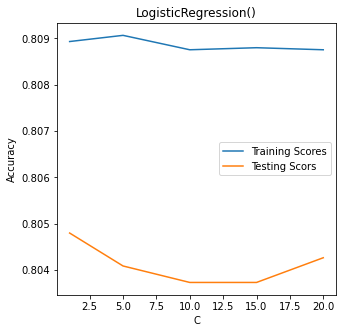

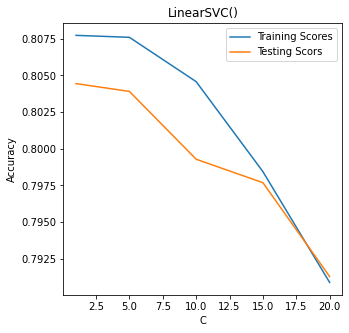

In [40]:
#Linear SVC and Logestic Parameters 
plot_parameter(grid3)
plot_parameter(grid2)
plt.show()

In [25]:
#Stratified k-fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
kFold = KFold(n_splits=10, shuffle=True, random_state=1)

In [26]:
# Changing the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling 
# only increased the score 1% in Nearest Centroid


#Nearest Centroid

param1 = {'metric':  ['euclidean', 'manhattan']}

grid1_kfold = GridSearchCV(clf1,param1,cv=skf,scoring='accuracy',return_train_score=True).fit(X_train_, y_train)
pred1=grid1_kfold.predict(X_test_)
print(clf1)
print(grid1_kfold.best_params_)
print(grid1_kfold.best_score_)

#Linear SVC
param2 = {'C' : [1,5,10,15,20]}
grid2_kfold = GridSearchCV(clf2,param2,cv=5,scoring='accuracy',return_train_score=True).fit(X_train_, y_train)
pred2=grid2_kfold.predict(X_test_)
print('\n',clf2)
print(grid2_kfold.best_params_)
print(grid2_kfold.best_score_)

#Logestic Regression
param3 = {'C' : [1,5,10,15,20]}
grid3_kfold = GridSearchCV(clf3,param3,cv=5,scoring='accuracy',return_train_score=True).fit(X_train_, y_train)
pred3=grid3_kfold.predict(X_test_)
print('\n',clf3)
print(grid3_kfold.best_params_)
print(grid3_kfold.best_score_)

NearestCentroid()
{'metric': 'euclidean'}
0.7315487064088544

 LinearSVC()
{'C': 1}
0.8044444444444444

 LogisticRegression()
{'C': 1}
0.8048


In [27]:
#Using hyper-parameters that showed good results in the gridsearch visualizing the coefficients
pipe1 = Pipeline(steps=[("ohe", col_transform), ("logistic", LogisticRegression(C =1))])
coefs=pipe1.fit(X_train, y_train)
coef1=coefs.named_steps['logistic'].coef_

pipe2 = Pipeline(steps=[("ohe", col_transform), ("svc", LinearSVC(C =1))])
coefs=pipe2.fit(X_train, y_train)
coef2=coefs.named_steps['svc'].coef_

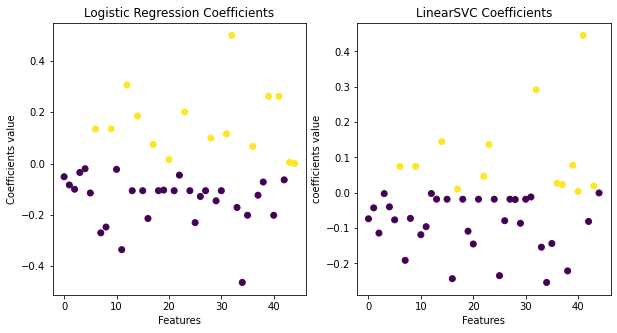

In [37]:
#visualizing the coefficients 

fig= plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(range(coef1.shape[1]),coef1,c=np.sign(coef1)) 
plt.xlabel('Features')
plt.ylabel('Coefficients value')
plt.title('Logistic Regression Coefficients')

plt.subplot(1, 2, 2)
plt.scatter(range(coef2.shape[1]),coef2,c=np.sign(coef2)) 
plt.xlabel('Features')
plt.ylabel('coefficients value')
plt.title('LinearSVC Coefficients')

plt.show()
